#Load Files

In [ ]:
from google.colab import files
files.upload()

!unzip images.zip

Saving images.zip to images.zip
Saving kaggle.json to kaggle.json
Archive:  images.zip
   creating: images/
  inflating: images/test(1).jpg      
  inflating: images/test(2).jpg      
  inflating: images/test(3).jpg      
  inflating: images/test(4).jpg      
  inflating: images/test(5).jpg      
  inflating: images/test(6).jpg      
  inflating: images/test(7).jpg      
  inflating: images/test(8).jpg      


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d zeinahisham/yolov4
!unzip yolov4.zip

 96% 219M/228M [00:01<00:00, 219MB/s]
100% 228M/228M [00:01<00:00, 191MB/s]
Archive:  yolov4.zip
  inflating: coco.names              
  inflating: yolov4.cfg              
  inflating: yolov4.weights          


# YOLOv4


In [ ]:
import cv2, os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def load_images(path):
    img_data_array = []
    for file in os.listdir(path):
        if any([file.endswith(x) for x in ['.jpeg', '.jpg']]):
            image_path = os.path.join(path, file)
            image = cv2.imread(image_path)
            img_data_array.append(image)
    return img_data_array

In [ ]:
x_data = load_images("images")
height, width, channels = x_data[0].shape

In [ ]:
classes = []
with open('coco.names', 'r') as f:
    classes = f.read().splitlines()

In [ ]:
yolo = cv2.dnn.readNetFromDarknet('yolov4.cfg', 'yolov4.weights')
model = cv2.dnn_DetectionModel(yolo)
model.setInputParams(scale= 1/255, size=(416, 416), swapRB=True, crop=False)

Objects detected: 2
cup: 0.99
microwave: 0.97


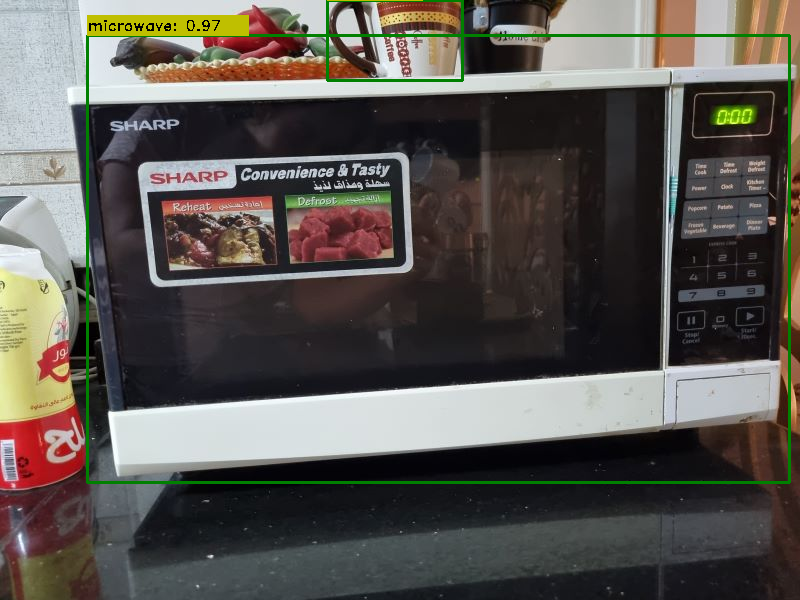

Objects detected: 2
cup: 0.94
microwave: 0.98


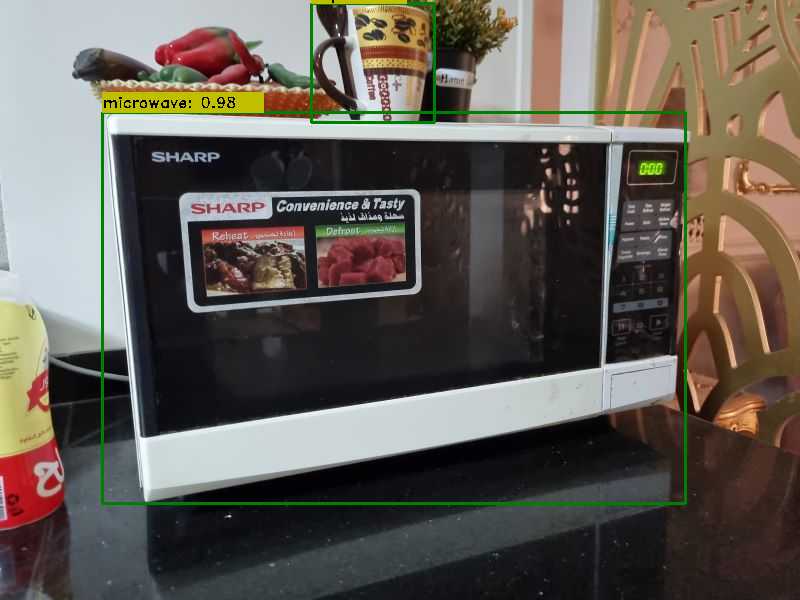

Objects detected: 4
knife: 0.99
knife: 0.99
spoon: 0.89
banana: 0.98


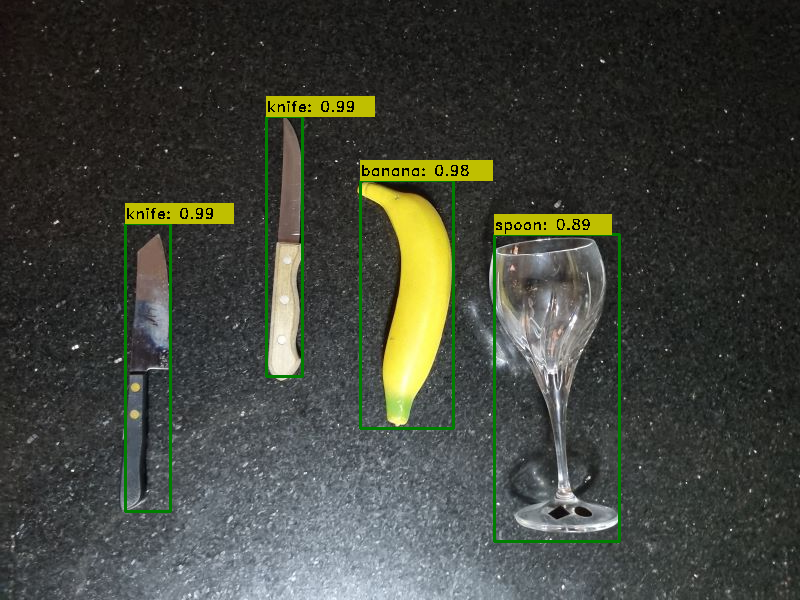

Objects detected: 2
wine glass: 0.99
vase: 0.97


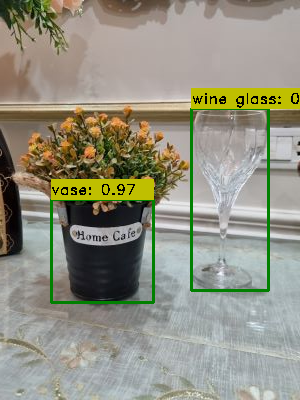

Objects detected: 1
laptop: 0.97


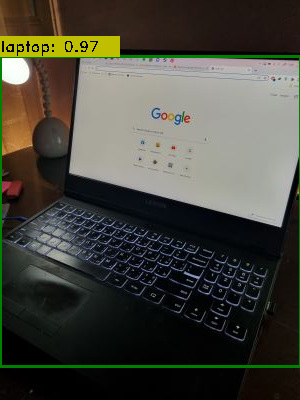

Objects detected: 6
wine glass: 0.99
wine glass: 0.80
chair: 0.80
vase: 0.98
vase: 0.98
vase: 0.86


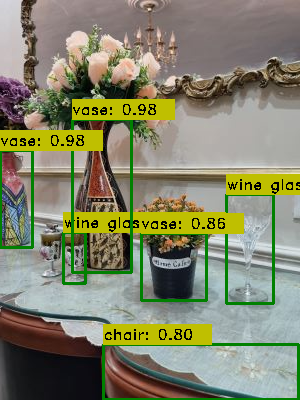

Objects detected: 5
spoon: 0.97
banana: 0.97
orange: 0.98
remote: 0.99
remote: 0.95


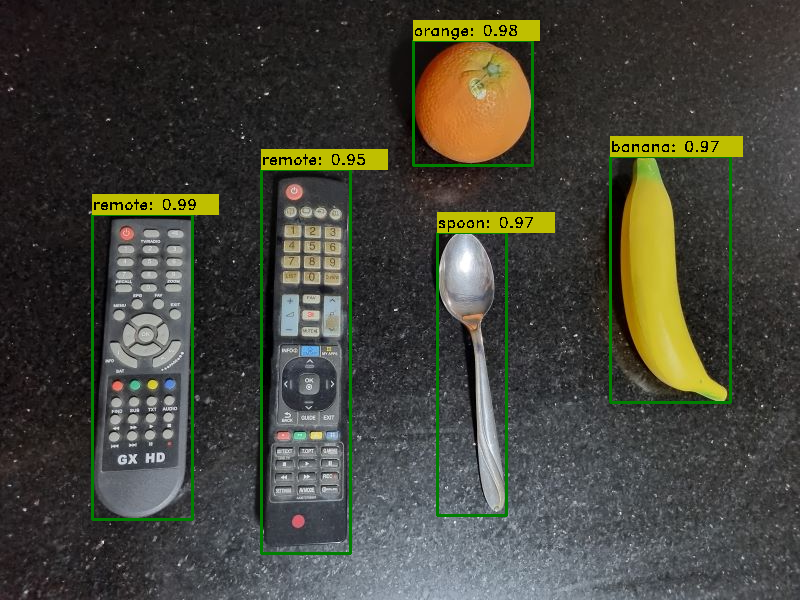

Objects detected: 4
cup: 0.99
fork: 0.99
spoon: 0.94
scissors: 0.99


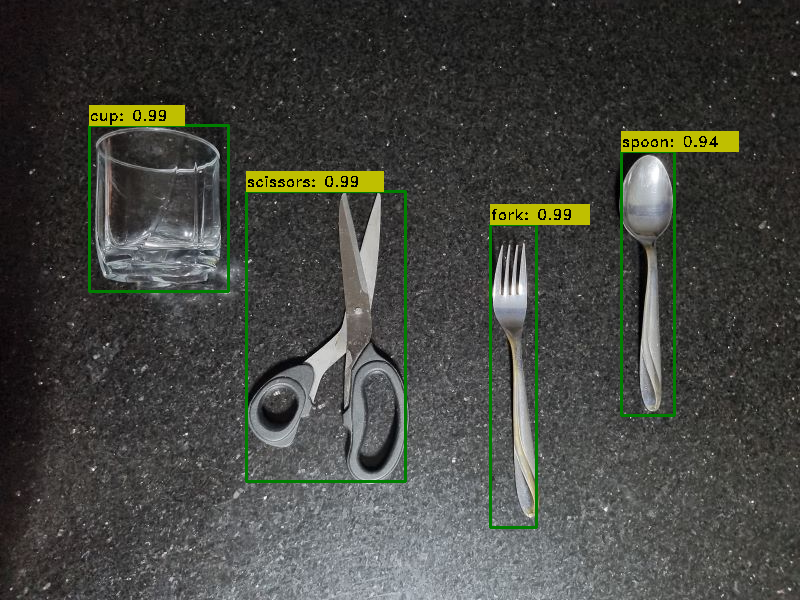

In [ ]:
for i in x_data:
  classIds, scores, boxes = model.detect(i, confThreshold=0.6, nmsThreshold=0.4)
  print('Objects detected: {}'.format(len(boxes)))

  img = i.copy()
  for (classId, score, box) in zip(classIds, scores, boxes):
    cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]),
                  color=(0, 128, 0), thickness=2)
    label = '%s: %.2f' % (str(classes[classId]), score)
    print(label)

    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_DUPLEX, 0.6, 1)   
    img = cv2.rectangle(img, (box[0], box[1] - 20), (box[0] + w, box[1]), color=(0, 191, 191), thickness = -1)
    cv2.putText(img, label, (box[0], box[1] - 5), cv2.FONT_HERSHEY_DUPLEX, 0.5, color=(0, 0, 0), thickness=1)

  cv2_imshow(img)